In [30]:
import numpy as np
import pandas as pd
import pickle

In [2]:
loan_data_inputs_train = pd.read_csv('loan_data_inputs_train.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('loan_data_targets_train.csv', index_col = 0, header=None)
loan_data_inputs_test = pd.read_csv('loan_data_inputs_test.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('loan_data_targets_test.csv', index_col = 0,header=None)


In [12]:
loan_data_targets_train.head()

,good_bad
427211,1
206088,1
136020,1
412305,0
36159,0


In [3]:
loan_data_inputs_train.shape

(373028, 324)

In [4]:
loan_data_targets_train.shape

(373028, 1)

# Selecting Features: dataframe only with dummy variables

In [6]:
#include variable on list of categories
lst_cat = pd.read_csv('List of Categories.csv')
#Read the csv: list of categories
cat_lst = lst_cat.iloc[:,0].tolist()
#Convert the dataframe to a list
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: ,cat_lst]
#Only select columns of dummy variables

In [7]:
lst_ref = pd.read_csv('Reference Categories.csv')
ref_lst = lst_ref.iloc[:,0].tolist()

In [8]:
inputs_train = inputs_train_with_ref_cat.drop(ref_lst, axis = 1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


# PD Model Estimation

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [10]:
reg = LogisticRegression()
# Create an instance of an object from the 'LogisticRegression' class

In [11]:
reg.fit(inputs_train, loan_data_targets_train)
# Estimates the coefficients of the object from the 'LogisticRegression' class
#  with inputs (independent variables) contained in the first dataframe
#  and targets (dependent variables) contained in the second dataframe.

D:\Python\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [13]:
reg.intercept_
# Displays the intercept contain in the estimated ("fitted") object 
#  from the 'LogisticRegression' class

array([-1.33109716])

In [14]:
reg.coef_
# Displays the coefficients contained in the estimated ("fitted") object 
#  from the 'LogisticRegression' class

array([[ 1.16008284,  0.90604921,  0.70885936,  0.51906025,  0.33683755,
         0.14489929,  0.09079978,  0.10678406,  0.02966994,  0.05525148,
         0.05661049,  0.05940666,  0.0749754 ,  0.13244822,  0.0993664 ,
         0.18112769,  0.22496699,  0.2203505 ,  0.25915818,  0.31662779,
         0.51750788,  0.08806821, -0.01075356,  0.30676924,  0.20251115,
         0.21415536,  0.26666828,  0.05443079,  0.07807866,  0.10017827,
         0.1253015 ,  0.08960002,  0.06084513,  0.12334594,  1.0750569 ,
         0.87435337,  0.77403278,  0.57294203,  0.41066148,  0.16587643,
        -0.06980998,  0.85056935,  0.53835044,  0.28958866,  0.10065124,
         0.05613393,  0.03783969,  0.07956727,  0.11956109,  0.12625937,
         0.07428147,  0.03130544,  0.63477025,  0.49137579,  0.28200959,
        -0.01101238, -0.10865449, -0.13433391, -0.14973997, -0.15435267,
        -0.11932294, -0.20970879,  0.12264537,  0.17843253, -0.02093656,
         0.02532754,  0.21758255,  0.0347043 ,  0.0

In [15]:
feature_name = inputs_train.columns.values
# Stores the names of the columns of a dataframe in a variable.

In [16]:
summary_table = pd.DataFrame(columns=['Feature Name'], data = feature_name)
# Create a dataframe with a column titled 'Feature name' and 
#  row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
#  with row values the transposed coefficients 
#  from the 'LogisticRegression' object
summary_table.index = summary_table.index + 1
# Increase the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.,add one row (intercept and its value )to this dataframe
summary_table = summary_table.sort_index()
# Sort the dataframe by index.
summary_table



,Feature Name,Coefficients
0,Intercept,-1.331097
1,grade:A,1.160083
2,grade:B,0.906049
3,grade:C,0.708859
4,grade:D,0.519060
...,...,...
100,mths_since_last_record:3-20,0.435608
101,mths_since_last_record:21-31,0.364479
102,mths_since_last_record:32-80,0.527065
103,mths_since_last_record:81-86,0.201849


# Build Logistic Regression Model with P-values

In [18]:
# As there is no built-in method to calcualte P values for 
#  sklearn logistic regression

# Build a Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)

    def fit(self,X,y):
        self.model.fit(X,y)
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X)
        Cramer_Rao = np.linalg.inv(F_ij)
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores]
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [19]:
# Replicate the codes in early section
reg = LogisticRegression_with_p_values()
reg.fit(inputs_train, loan_data_targets_train)
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

D:\Python\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,Feature name,Coefficients
0,Intercept,-1.331097
1,grade:A,1.160083
2,grade:B,0.906049
3,grade:C,0.708859
4,grade:D,0.519060
...,...,...
100,mths_since_last_record:3-20,0.435608
101,mths_since_last_record:21-31,0.364479
102,mths_since_last_record:32-80,0.527065
103,mths_since_last_record:81-86,0.201849


In [20]:
# Store p-values for easier access
p_values = reg.p_values

In [21]:
# Add the value 'NaN' in the beginning of the variable with p-values,np.append(np.nan,x)
# Convert it to a array, np.array(p_values)
p_values = np.append(np.nan, np.array(p_values))

In [22]:
summary_table['P Values'] = p_values
summary_table

,Feature name,Coefficients,P Values
0,Intercept,-1.331097,NaN
1,grade:A,1.160083,1.708900e-37
2,grade:B,0.906049,1.040941e-49
3,grade:C,0.708859,6.553526e-36
4,grade:D,0.519060,4.998000e-22
...,...,...,...
100,mths_since_last_record:3-20,0.435608,6.076052e-04
101,mths_since_last_record:21-31,0.364479,1.780846e-03
102,mths_since_last_record:32-80,0.527065,5.047392e-09
103,mths_since_last_record:81-86,0.201849,5.754917e-02


# Build Logistic Regression Models without Insignificant Variables

In [24]:
#Overwrite the dataframe with the significant categories

lst_cat = pd.read_csv('List of Sig Categories.csv')
#Read the csv: list of significant categories
cat_lst = lst_cat.iloc[:,0].tolist()
#Convert the dataframe to a list
inputs_train_with_ref_cat = loan_data_inputs_train.loc[: ,cat_lst]
#Only select columns of dummy variables
inputs_train_with_ref_cat

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
206088,0,0,1,0,0,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,0
136020,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
412305,0,0,0,1,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
36159,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0,1,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
365838,0,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,0,0,0,0,0
131932,0,1,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
146867,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [26]:
# Remove the reference categories
lst_ref = pd.read_csv('Sig Ref Categories.csv')
ref_lst = lst_ref.iloc[:,0].tolist()
inputs_train = inputs_train_with_ref_cat.drop(ref_lst, axis = 1)
inputs_train

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
427211,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
206088,0,0,1,0,0,0,0,1,0,0,...,0,1,0,0,1,0,0,0,0,0
136020,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
412305,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
36159,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259178,0,1,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
365838,0,1,0,0,0,0,0,0,0,1,...,0,1,0,0,1,0,0,0,0,0
131932,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
146867,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


In [27]:
reg2 = LogisticRegression_with_p_values()
reg2.fit(inputs_train, loan_data_targets_train)

D:\Python\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\Python\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
feature_name = inputs_train.columns.values
summary_table = pd.DataFrame(columns = ['Feature name'], data = feature_name)
summary_table['Coefficients'] = np.transpose(reg2.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg2.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table



,Feature name,Coefficients
0,Intercept,-1.374043
1,grade:A,1.123659
2,grade:B,0.878920
3,grade:C,0.684798
4,grade:D,0.496923
...,...,...
80,mths_since_last_record:3-20,0.440625
81,mths_since_last_record:21-31,0.350712
82,mths_since_last_record:32-80,0.502959
83,mths_since_last_record:81-86,0.175839


In [29]:
# Add P values
p_values = reg2.p_values
p_values = np.append(np.nan, np.array(p_values))
summary_table['P Values'] = p_values
summary_table

,Feature name,Coefficients,P Values
0,Intercept,-1.374043,NaN
1,grade:A,1.123659,3.230098e-35
2,grade:B,0.878920,4.277095e-47
3,grade:C,0.684798,6.710540e-34
4,grade:D,0.496923,1.347012e-20
...,...,...,...
80,mths_since_last_record:3-20,0.440625,3.347080e-04
81,mths_since_last_record:21-31,0.350712,1.832351e-03
82,mths_since_last_record:32-80,0.502959,3.963469e-09
83,mths_since_last_record:81-86,0.175839,8.604587e-02


In [31]:
pickle.dump(reg2, open('pd_model.sav', 'wb'))
# Here we export our model to a 'SAV' file with file name 'pd_model.sav'.

# PD Model Validation

## Remove insignificant variables from test dataframe

In [32]:
inputs_test_with_ref_cat = loan_data_inputs_test.loc[:,cat_lst]
inputs_test_with_ref_cat

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,1,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
296284,0,1,0,0,0,0,0,1,0,0,...,0,0,1,1,0,0,0,0,0,0
61777,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
91763,1,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [33]:
inputs_test = inputs_test_with_ref_cat.drop(ref_lst, axis = 1)
inputs_test

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,addr_state:NY,...,mths_since_last_delinq:Missing,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
288564,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
213591,0,0,1,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
263083,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
165001,1,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0,1,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
296284,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
61777,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
91763,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


## Estimate the probability of default for each observation

In [34]:
y_hat_test = reg2.model.predict(inputs_test)
# Calculates the predicted values for the dependent variable (targets)
#  based on the values of the independent variables (inputs) supplied as an argument.
y_hat_test

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [35]:
y_hat_test_proba = reg2.model.predict_proba(inputs_test)
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.
y_hat_test_proba

array([[0.07569435, 0.92430565],
       [0.15076128, 0.84923872],
       [0.11465059, 0.88534941],
       ...,
       [0.02678657, 0.97321343],
       [0.04020854, 0.95979146],
       [0.04763348, 0.95236652]])

In [36]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]
# Only leave the 'good' probabilities in the array
y_hat_test_proba

array([0.92430565, 0.84923872, 0.88534941, ..., 0.97321343, 0.95979146,
       0.95236652])

In [37]:
loan_data_targets_test_temp = loan_data_targets_test.copy()
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
# Reset the index of a dataframe, as we need to concat the dfs

In [38]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test_temp, pd.DataFrame(y_hat_test_proba)], axis = 1)
# Concatenates two dataframes
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']
# Rename the columns
df_actual_predicted_probs.index = loan_data_targets_test.index
# Revert the index
df_actual_predicted_probs.head()


,loan_data_targets_test,y_hat_test_proba
362514,1,0.924306
288564,1,0.849239
213591,1,0.885349
263083,1,0.940636
165001,1,0.968665


## Confusion Matrix

In [39]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = np.where(df_actual_predicted_probs['y_hat_test_proba'] >= tr, 1,0)
df_actual_predicted_probs

,loan_data_targets_test,y_hat_test_proba,y_hat_test
362514,1,0.924306,1
288564,1,0.849239,0
213591,1,0.885349,0
263083,1,0.940636,1
165001,1,0.968665,1
...,...,...,...
115,1,0.880174,0
296284,1,0.966433,1
61777,0,0.973213,1
91763,1,0.959791,1


In [40]:
confusion_matrix = pd.crosstab(df_actual_predicted_probs['loan_data_targets_test'],
                               df_actual_predicted_probs['y_hat_test'],
                               rownames = ['Actual'], colnames = ['Predicted'])
confusion_matrix

Predicted,0,1
Actual,,
0,7374,2816
1,35813,47254


In [41]:
confusion_matrix_per = confusion_matrix / df_actual_predicted_probs.shape[0]
confusion_matrix_per

Predicted,0,1
Actual,,
0,0.079072,0.030196
1,0.384025,0.506707


In [42]:
true_neg = confusion_matrix_per.iloc[0,0]
true_pos = confusion_matrix_per.iloc[1,1]
true_rate = true_neg + true_pos
true_rate

0.5857790836076648

##  ROC Curve and AUC

In [43]:
from sklearn.metrics import roc_curve, roc_auc_score

In [44]:
log_roc = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], 
                    df_actual_predicted_probs['y_hat_test_proba'])
log_roc
# Returns the Receiver Operating Characteristic (ROC) Curve from 
#  a set of actual values and their predicted probabilities
# As a result, we get three arrays: the false positive rates, 
#  the true positive rates, and the thresholds

(array([0.        , 0.        , 0.        , ..., 0.99960746, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.20384750e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00]),
 array([1.99262871, 0.99262871, 0.99069783, ..., 0.48790918, 0.39373569,
        0.37528169]))

In [45]:
fpr,tpr,thresholds = log_roc
# Store each of the three arrays in a separate variable

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Text(0.5, 1.0, 'ROC curve')

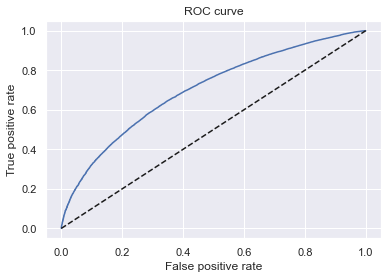

In [47]:
plt.plot(fpr,tpr)
plt.plot(tpr,tpr, linestyle = '--', color ='k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')

In [48]:
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], 
                      df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.7022080979052426

## Gini and Kolmogorov-Smirnov

In [49]:
# Sort the table by test_prob values in ascending order
df_actual_predicted_probs = \
df_actual_predicted_probs.sort_values('y_hat_test_proba')

# Reset the index from 0
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
df_actual_predicted_probs

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test
0,42341,1,0.375282,0
1,42344,1,0.392100,0
2,39810,0,0.393736,0
3,40518,0,0.448968,0
4,42396,0,0.457734,0
...,...,...,...,...
93252,262480,1,0.991292,1
93253,231463,1,0.991304,1
93254,239228,1,0.991652,1
93255,261086,1,0.992058,1


In [50]:
df_actual_predicted_probs['Cumulative N Population'] = \
df_actual_predicted_probs.index + 1
df_actual_predicted_probs['Cumulative N Good'] = \
df_actual_predicted_probs['loan_data_targets_test'].cumsum()
df_actual_predicted_probs['Cumulative N Bad'] = \
df_actual_predicted_probs['Cumulative N Population'] - \
df_actual_predicted_probs['Cumulative N Good']
df_actual_predicted_probs

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad
0,42341,1,0.375282,0,1,1,0
1,42344,1,0.392100,0,2,2,0
2,39810,0,0.393736,0,3,2,1
3,40518,0,0.448968,0,4,2,2
4,42396,0,0.457734,0,5,2,3
...,...,...,...,...,...,...,...
93252,262480,1,0.991292,1,93253,83063,10190
93253,231463,1,0.991304,1,93254,83064,10190
93254,239228,1,0.991652,1,93255,83065,10190
93255,261086,1,0.992058,1,93256,83066,10190


In [51]:
df_actual_predicted_probs['Cumulative Perc Population'] = \
df_actual_predicted_probs['Cumulative N Population'] / df_actual_predicted_probs.shape[0]
df_actual_predicted_probs['Cumulative Perc Good'] = \
df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
df_actual_predicted_probs['Cumulative Perc Bad'] = \
df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())
df_actual_predicted_probs



,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42341,1,0.375282,0,1,1,0,0.000011,0.000012,0.000000
1,42344,1,0.392100,0,2,2,0,0.000021,0.000024,0.000000
2,39810,0,0.393736,0,3,2,1,0.000032,0.000024,0.000098
3,40518,0,0.448968,0,4,2,2,0.000043,0.000024,0.000196
4,42396,0,0.457734,0,5,2,3,0.000054,0.000024,0.000294
...,...,...,...,...,...,...,...,...,...,...
93252,262480,1,0.991292,1,93253,83063,10190,0.999957,0.999952,1.000000
93253,231463,1,0.991304,1,93254,83064,10190,0.999968,0.999964,1.000000
93254,239228,1,0.991652,1,93255,83065,10190,0.999979,0.999976,1.000000
93255,261086,1,0.992058,1,93256,83066,10190,0.999989,0.999988,1.000000


Text(0.5, 1.0, 'Gini')

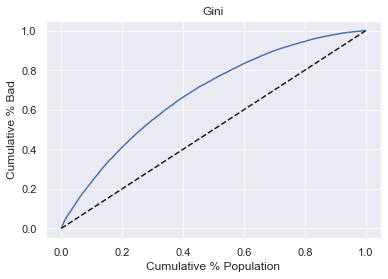

In [52]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'],
         df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['Cumulative Perc Bad'],
         df_actual_predicted_probs['Cumulative Perc Bad'],
        linestyle = '--', color ='k')
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini')

In [53]:
Gini = AUROC * 2 - 1
Gini

0.40441619581048527

Text(0.5, 1.0, 'Kolmogorov-Smirnov')

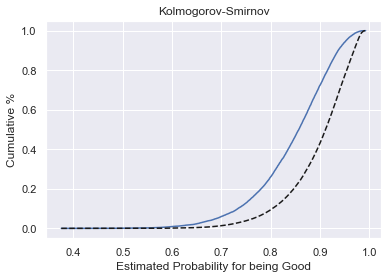

In [54]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'],
         df_actual_predicted_probs['Cumulative Perc Bad'])
plt.plot(df_actual_predicted_probs['y_hat_test_proba'],
         df_actual_predicted_probs['Cumulative Perc Good'],
        linestyle = '--', color ='k')
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov')

In [55]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
KS

0.2966746932223847

# PD Model and Scorecard

In [56]:
summary_table

,Feature name,Coefficients,P Values
0,Intercept,-1.374043,NaN
1,grade:A,1.123659,3.230098e-35
2,grade:B,0.878920,4.277095e-47
3,grade:C,0.684798,6.710540e-34
4,grade:D,0.496923,1.347012e-20
...,...,...,...
80,mths_since_last_record:3-20,0.440625,3.347080e-04
81,mths_since_last_record:21-31,0.350712,1.832351e-03
82,mths_since_last_record:32-80,0.502959,3.963469e-09
83,mths_since_last_record:81-86,0.175839,8.604587e-02


In [57]:
ref_lst

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'addr_state:ND_NE_IA_NV_FL_HI_AL',
 'verification_status:Verified',
 'purpose:educ__sm_b__wedd__ren_en__mov__house',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'mths_since_issue_d:>84',
 'int_rate:>20.281',
 'mths_since_earliest_cr_line:<140',
 'inq_last_6mths:>6',
 'acc_now_delinq:0',
 'annual_inc:<20K',
 'dti:>35',
 'mths_since_last_delinq:0-3',
 'mths_since_last_record:0-2']

In [58]:
df_ref_cat = pd.DataFrame(columns = ['Feature name'], data = ref_lst)
df_ref_cat['Coefficients'] = 0
df_ref_cat['P Values'] = np.nan
df_ref_cat

,Feature name,Coefficients,P Values
0,grade:G,0,NaN
1,home_ownership:RENT_OTHER_NONE_ANY,0,NaN
2,addr_state:ND_NE_IA_NV_FL_HI_AL,0,NaN
3,verification_status:Verified,0,NaN
4,purpose:educ__sm_b__wedd__ren_en__mov__house,0,NaN
5,initial_list_status:f,0,NaN
6,term:60,0,NaN
7,emp_length:0,0,NaN
8,mths_since_issue_d:>84,0,NaN
9,int_rate:>20.281,0,NaN


In [59]:
# Concat the ref cats with summary_table
df_scorecard = pd.concat([summary_table, df_ref_cat])
df_scorecard = df_scorecard.reset_index()
df_scorecard.drop(['index'], axis= 1, inplace = True)
df_scorecard

,Feature name,Coefficients,P Values
0,Intercept,-1.374043,NaN
1,grade:A,1.123659,3.230098e-35
2,grade:B,0.878920,4.277095e-47
3,grade:C,0.684798,6.710540e-34
4,grade:D,0.496923,1.347012e-20
...,...,...,...
97,acc_now_delinq:0,0.000000,NaN
98,annual_inc:<20K,0.000000,NaN
99,dti:>35,0.000000,NaN
100,mths_since_last_delinq:0-3,0.000000,NaN


In [60]:
# Extract original feature name
df_scorecard['Original feature name'] = \
df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,Feature name,Coefficients,P Values,Original feature name
0,Intercept,-1.374043,NaN,Intercept
1,grade:A,1.123659,3.230098e-35,grade
2,grade:B,0.878920,4.277095e-47,grade
3,grade:C,0.684798,6.710540e-34,grade
4,grade:D,0.496923,1.347012e-20,grade
...,...,...,...,...
97,acc_now_delinq:0,0.000000,NaN,acc_now_delinq
98,annual_inc:<20K,0.000000,NaN,annual_inc
99,dti:>35,0.000000,NaN,dti
100,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq


## Build grouped tables and calculate the SUM

In [61]:
# Group the coefficients by feature name
df_scorecard_group_min = \
df_scorecard.groupby('Original feature name')['Coefficients'].min()
df_scorecard_group_max = \
df_scorecard.groupby('Original feature name')['Coefficients'].max()

In [62]:
df_scorecard_group_min

Original feature name
Intercept                     -1.374043
acc_now_delinq                 0.000000
addr_state                     0.000000
annual_inc                    -0.081517
dti                            0.000000
emp_length                     0.000000
grade                          0.000000
home_ownership                 0.000000
initial_list_status            0.000000
inq_last_6mths                 0.000000
int_rate                       0.000000
mths_since_earliest_cr_line    0.000000
mths_since_issue_d            -0.071791
mths_since_last_delinq         0.000000
mths_since_last_record         0.000000
purpose                        0.000000
term                           0.000000
verification_status           -0.011184
Name: Coefficients, dtype: float64

In [63]:
df_scorecard_group_max

Original feature name
Intercept                     -1.374043
acc_now_delinq                 0.180363
addr_state                     0.521965
annual_inc                     0.552377
dti                            0.384452
emp_length                     0.125852
grade                          1.123659
home_ownership                 0.106249
initial_list_status            0.053828
inq_last_6mths                 0.666272
int_rate                       0.883152
mths_since_earliest_cr_line    0.129361
mths_since_issue_d             1.084204
mths_since_last_delinq         0.183095
mths_since_last_record         0.502959
purpose                        0.301855
term                           0.078943
verification_status            0.085720
Name: Coefficients, dtype: float64

In [64]:
min_sum_coef = df_scorecard_group_min.sum()
min_sum_coef

-1.5385360036156914

In [65]:
max_sum_coef = df_scorecard_group_max.sum()
max_sum_coef

5.590261841535736

In [66]:
min_score = 300
max_score = 850

## Calculate the scores for each variable

In [67]:
df_scorecard

,Feature name,Coefficients,P Values,Original feature name
0,Intercept,-1.374043,NaN,Intercept
1,grade:A,1.123659,3.230098e-35,grade
2,grade:B,0.878920,4.277095e-47,grade
3,grade:C,0.684798,6.710540e-34,grade
4,grade:D,0.496923,1.347012e-20,grade
...,...,...,...,...
97,acc_now_delinq:0,0.000000,NaN,acc_now_delinq
98,annual_inc:<20K,0.000000,NaN,annual_inc
99,dti:>35,0.000000,NaN,dti
100,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq


In [68]:
df_scorecard['Score - Calculation'] = \
df_scorecard['Coefficients']*(max_score - min_score)/(max_sum_coef - min_sum_coef)
df_scorecard

,Feature name,Coefficients,P Values,Original feature name,Score - Calculation
0,Intercept,-1.374043,NaN,Intercept,-106.009982
1,grade:A,1.123659,3.230098e-35,grade,86.692397
2,grade:B,0.878920,4.277095e-47,grade,67.810310
3,grade:C,0.684798,6.710540e-34,grade,52.833417
4,grade:D,0.496923,1.347012e-20,grade,38.338522
...,...,...,...,...,...
97,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000
98,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000
99,dti:>35,0.000000,NaN,dti,0.000000
100,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000


In [69]:
#Calculate the intercept
df_scorecard['Score - Calculation'][0] = \
(max_score - min_score)/(max_sum_coef - min_sum_coef) * \
(df_scorecard['Coefficients'][0] - min_sum_coef) + min_score
df_scorecard

C:\Users\XIAOJIN LI\AppData\Local\Temp\ipykernel_13792\401267307.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = \


,Feature name,Coefficients,P Values,Original feature name,Score - Calculation
0,Intercept,-1.374043,NaN,Intercept,312.690930
1,grade:A,1.123659,3.230098e-35,grade,86.692397
2,grade:B,0.878920,4.277095e-47,grade,67.810310
3,grade:C,0.684798,6.710540e-34,grade,52.833417
4,grade:D,0.496923,1.347012e-20,grade,38.338522
...,...,...,...,...,...
97,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000
98,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000
99,dti:>35,0.000000,NaN,dti,0.000000
100,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000


In [70]:
# Round the scores
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
df_scorecard

,Feature name,Coefficients,P Values,Original feature name,Score - Calculation,Score - Preliminary
0,Intercept,-1.374043,NaN,Intercept,312.690930,313.0
1,grade:A,1.123659,3.230098e-35,grade,86.692397,87.0
2,grade:B,0.878920,4.277095e-47,grade,67.810310,68.0
3,grade:C,0.684798,6.710540e-34,grade,52.833417,53.0
4,grade:D,0.496923,1.347012e-20,grade,38.338522,38.0
...,...,...,...,...,...,...
97,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000,0.0
98,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000,0.0
99,dti:>35,0.000000,NaN,dti,0.000000,0.0
100,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000,0.0


In [71]:
# Check if the sum of the scores would be correct
min_sum_score_prel = \
df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().sum()
min_sum_score_prel

300.0

In [72]:
max_sum_score_prel = \
df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().sum()
max_sum_score_prel
# Have to subtract the 1 extra point

851.0

In [73]:
df_scorecard['Difference'] = \
df_scorecard['Score - Preliminary'] - df_scorecard['Score - Calculation']
pd.options.display.max_rows = 30
df_scorecard

,Feature name,Coefficients,P Values,Original feature name,Score - Calculation,Score - Preliminary,Difference
0,Intercept,-1.374043,NaN,Intercept,312.690930,313.0,0.309070
1,grade:A,1.123659,3.230098e-35,grade,86.692397,87.0,0.307603
2,grade:B,0.878920,4.277095e-47,grade,67.810310,68.0,0.189690
3,grade:C,0.684798,6.710540e-34,grade,52.833417,53.0,0.166583
4,grade:D,0.496923,1.347012e-20,grade,38.338522,38.0,-0.338522
...,...,...,...,...,...,...,...
97,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000,0.0,0.000000
98,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000,0.0,0.000000
99,dti:>35,0.000000,NaN,dti,0.000000,0.0,0.000000
100,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000,0.0,0.000000


In [74]:
# Find the max score among each parent category

ind = list(df_scorecard.index) #Create an index list
max_difference = [] #Create an empty set to store max difference for each cat
for i in ind:
    ori_name = df_scorecard['Original feature name'][i]
    this_score = df_scorecard['Score - Preliminary'][i]
    max_score_t = df_scorecard.loc[df_scorecard['Original feature name']
                               == ori_name]['Score - Preliminary'].max()
    this_diff = df_scorecard['Difference'][i]
    
    if this_score == max_score_t:
        max_difference.append(this_diff)
    else:
        max_difference.append(0)

In [75]:
df_scorecard['Max_Difference'] = max_difference
df_scorecard['Max_Difference'][0] = 0
#pd.options.display.max_rows = 30
df_scorecard

C:\Users\XIAOJIN LI\AppData\Local\Temp\ipykernel_13792\1330656845.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Max_Difference'][0] = 0


,Feature name,Coefficients,P Values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Max_Difference
0,Intercept,-1.374043,NaN,Intercept,312.690930,313.0,0.309070,0.000000
1,grade:A,1.123659,3.230098e-35,grade,86.692397,87.0,0.307603,0.307603
2,grade:B,0.878920,4.277095e-47,grade,67.810310,68.0,0.189690,0.000000
3,grade:C,0.684798,6.710540e-34,grade,52.833417,53.0,0.166583,0.000000
4,grade:D,0.496923,1.347012e-20,grade,38.338522,38.0,-0.338522,0.000000
...,...,...,...,...,...,...,...,...
97,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000,0.0,0.000000,0.000000
98,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000,0.0,0.000000,0.000000
99,dti:>35,0.000000,NaN,dti,0.000000,0.0,0.000000,0.000000
100,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000,0.0,0.000000,0.000000


In [76]:
# Get the item rounded the most among high-score categories
max_diff_ind = df_scorecard['Max_Difference'].idxmax()
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][max_diff_ind] = \
df_scorecard['Score - Final'][max_diff_ind] - 1

C:\Users\XIAOJIN LI\AppData\Local\Temp\ipykernel_13792\1717411435.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][max_diff_ind] = \


In [77]:
max_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].max().sum()
max_sum_score_prel

850.0

In [78]:
min_sum_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].min().sum()
min_sum_score_prel



300.0

## Calculate credit scores

In [79]:
inputs_test_with_ref_cat.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,home_ownership:MORTGAGE,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
288564,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
213591,0,0,1,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0
263083,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
165001,1,0,0,0,0,0,0,0,0,1,...,0,1,0,1,0,0,0,0,0,0


In [80]:
df_scorecard

,Feature name,Coefficients,P Values,Original feature name,Score - Calculation,Score - Preliminary,Difference,Max_Difference,Score - Final
0,Intercept,-1.374043,NaN,Intercept,312.690930,313.0,0.309070,0.000000,313.0
1,grade:A,1.123659,3.230098e-35,grade,86.692397,87.0,0.307603,0.307603,87.0
2,grade:B,0.878920,4.277095e-47,grade,67.810310,68.0,0.189690,0.000000,68.0
3,grade:C,0.684798,6.710540e-34,grade,52.833417,53.0,0.166583,0.000000,53.0
4,grade:D,0.496923,1.347012e-20,grade,38.338522,38.0,-0.338522,0.000000,38.0
...,...,...,...,...,...,...,...,...,...
97,acc_now_delinq:0,0.000000,NaN,acc_now_delinq,0.000000,0.0,0.000000,0.000000,0.0
98,annual_inc:<20K,0.000000,NaN,annual_inc,0.000000,0.0,0.000000,0.000000,0.0
99,dti:>35,0.000000,NaN,dti,0.000000,0.0,0.000000,0.000000,0.0
100,mths_since_last_delinq:0-3,0.000000,NaN,mths_since_last_delinq,0.000000,0.0,0.000000,0.000000,0.0


In [81]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [82]:
# Add a 'intercept' column
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)
inputs_test_with_ref_cat_w_intercept

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,home_ownership:RENT_OTHER_NONE_ANY,home_ownership:OWN,...,mths_since_last_delinq:4-30,mths_since_last_delinq:31-56,mths_since_last_delinq:>=57,mths_since_last_record:Missing,mths_since_last_record:0-2,mths_since_last_record:3-20,mths_since_last_record:21-31,mths_since_last_record:32-80,mths_since_last_record:81-86,mths_since_last_record:>86
362514,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
288564,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
213591,1,0,0,1,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
263083,1,0,0,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
165001,1,1,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
296284,1,0,1,0,0,0,0,0,1,0,...,0,0,1,1,0,0,0,0,0,0
61777,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
91763,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [83]:
# Make the column order match the row orde of the scorecard df
inputs_test_with_ref_cat_w_intercept = \
inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
inputs_test_with_ref_cat_w_intercept

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,addr_state:NM_VA,...,emp_length:0,mths_since_issue_d:>84,int_rate:>20.281,mths_since_earliest_cr_line:<140,inq_last_6mths:>6,acc_now_delinq:0,annual_inc:<20K,dti:>35,mths_since_last_delinq:0-3,mths_since_last_record:0-2
362514,1,0,0,1,0,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
288564,1,0,0,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
213591,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
263083,1,0,0,1,0,0,0,0,1,0,...,0,0,0,1,0,1,0,0,0,0
165001,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,1,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
296284,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
61777,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
91763,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0


In [84]:
scorecard_scores = df_scorecard['Score - Final']
scorecard_scores.shape

(102,)

In [85]:
inputs_test_with_ref_cat_w_intercept.shape

(93257, 102)

In [86]:
# Reshape the scorecard_scores
scorecard_scores = scorecard_scores.values.reshape(scorecard_scores.shape[0],1)
scorecard_scores.shape

(102, 1)

In [87]:
#Calculate credit scores all accounts
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)
y_scores

,0
362514,614.0
288564,553.0
213591,577.0
263083,633.0
165001,683.0
...,...
115,573.0
296284,679.0
61777,696.0
91763,664.0


## From Credit Score to PD

In [88]:
#Convert PD to sum of the coeffs
sum_coef_from_score = \
((y_scores - min_score) / (max_score - min_score)) * \
(max_sum_coef - min_sum_coef) + min_sum_coef
sum_coef_from_score

,0
362514,2.531359
288564,1.740711
213591,2.051786
263083,2.777627
165001,3.425700
...,...
115,1.999940
296284,3.373854
61777,3.594198
91763,3.179432


In [89]:
y_hat_proba_from_score = \
np.exp(sum_coef_from_score) / (np.exp(sum_coef_from_score) + 1)
y_hat_proba_from_score.head()

,0
362514,0.926311
288564,0.850777
213591,0.886128
263083,0.941455
165001,0.968498


In [90]:
y_hat_test_proba

array([0.92430565, 0.84923872, 0.88534941, ..., 0.97321343, 0.95979146,
       0.95236652])

## Setting Cut-offs

In [91]:
tr = 0.9
df_actual_predicted_probs['y_hat_test'] = \
np.where(df_actual_predicted_probs['y_hat_test_proba'] >= tr, 1,0)
df_actual_predicted_probs

,index,loan_data_targets_test,y_hat_test_proba,y_hat_test,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
0,42341,1,0.375282,0,1,1,0,0.000011,0.000012,0.000000
1,42344,1,0.392100,0,2,2,0,0.000021,0.000024,0.000000
2,39810,0,0.393736,0,3,2,1,0.000032,0.000024,0.000098
3,40518,0,0.448968,0,4,2,2,0.000043,0.000024,0.000196
4,42396,0,0.457734,0,5,2,3,0.000054,0.000024,0.000294
...,...,...,...,...,...,...,...,...,...,...
93252,262480,1,0.991292,1,93253,83063,10190,0.999957,0.999952,1.000000
93253,231463,1,0.991304,1,93254,83064,10190,0.999968,0.999964,1.000000
93254,239228,1,0.991652,1,93255,83065,10190,0.999979,0.999976,1.000000
93255,261086,1,0.992058,1,93256,83066,10190,0.999989,0.999988,1.000000


In [92]:
[thresholds, fpr, tpr]

[array([1.99262871, 0.99262871, 0.99069783, ..., 0.48790918, 0.39373569,
        0.37528169]),
 array([0.        , 0.        , 0.        , ..., 0.99960746, 1.        ,
        1.        ]),
 array([0.00000000e+00, 1.20384750e-05, 1.20384750e-04, ...,
        9.99975923e-01, 9.99975923e-01, 1.00000000e+00])]

In [93]:
df_cutoffs = pd.concat([pd.DataFrame(thresholds), pd.DataFrame(fpr), pd.DataFrame(tpr)], axis = 1)
df_cutoffs

,0,0,0
0,1.992629,0.000000,0.000000
1,0.992629,0.000000,0.000012
2,0.990698,0.000000,0.000120
3,0.990653,0.000098,0.000120
4,0.989762,0.000098,0.000433
...,...,...,...
17257,0.493406,0.999411,0.999964
17258,0.488601,0.999607,0.999964
17259,0.487909,0.999607,0.999976
17260,0.393736,1.000000,0.999976


In [94]:
df_cutoffs.columns = ['thresholds', 'fpr', 'tpr']
df_cutoffs

,thresholds,fpr,tpr
0,1.992629,0.000000,0.000000
1,0.992629,0.000000,0.000012
2,0.990698,0.000000,0.000120
3,0.990653,0.000098,0.000120
4,0.989762,0.000098,0.000433
...,...,...,...
17257,0.493406,0.999411,0.999964
17258,0.488601,0.999607,0.999964
17259,0.487909,0.999607,0.999976
17260,0.393736,1.000000,0.999976


In [95]:
df_cutoffs['thresholds'][0] = 1 - 1 / np.power(10, 16)
# Let the first threshold (the value of the thresholds column with index 0) be 
#  equal to a number, very close to 1
df_cutoffs

,thresholds,fpr,tpr
0,1.000000,0.000000,0.000000
1,0.992629,0.000000,0.000012
2,0.990698,0.000000,0.000120
3,0.990653,0.000098,0.000120
4,0.989762,0.000098,0.000433
...,...,...,...
17257,0.493406,0.999411,0.999964
17258,0.488601,0.999607,0.999964
17259,0.487909,0.999607,0.999976
17260,0.393736,1.000000,0.999976


In [96]:
#Convert the threshold to equivalent Credit Scores
df_cutoffs['Score'] = \
((np.log(df_cutoffs['thresholds'] / (1 - df_cutoffs['thresholds'])) \
  - min_sum_coef) * ((max_score - min_score) \
                     / (max_sum_coef - min_sum_coef)) + min_score).round()
df_cutoffs['Score'][0] = max_score
df_cutoffs

,thresholds,fpr,tpr,Score
0,1.000000,0.000000,0.000000,850.0
1,0.992629,0.000000,0.000012,797.0
2,0.990698,0.000000,0.000120,779.0
3,0.990653,0.000098,0.000120,778.0
4,0.989762,0.000098,0.000433,771.0
...,...,...,...,...
17257,0.493406,0.999411,0.999964,417.0
17258,0.488601,0.999607,0.999964,415.0
17259,0.487909,0.999607,0.999976,415.0
17260,0.393736,1.000000,0.999976,385.0


In [97]:
# Define a function that assigns 1 if predicted probability is greater 
#  than the parameter p (threshold), and a value 0 if it is not
# Then, it sums the column, returns the total number of rows greater than the p
def n_approved(p):
    return df_actual_predicted_probs.\
loc[df_actual_predicted_probs['y_hat_test_proba'] >= p]['index'].count()

In [98]:
df_cutoffs['N Approved'] = df_cutoffs['thresholds'].apply(n_approved)
df_cutoffs['N Rejected'] = \
df_actual_predicted_probs.shape[0] - df_cutoffs['N Approved']
df_cutoffs['Approval Rate'] = \
df_cutoffs['N Approved'] / df_actual_predicted_probs.shape[0]
df_cutoffs['Rejection Rate'] = 1 - df_cutoffs['Approval Rate']
df_cutoffs

,thresholds,fpr,tpr,Score,N Approved,N Rejected,Approval Rate,Rejection Rate
0,1.000000,0.000000,0.000000,850.0,0,93257,0.000000,1.000000
1,0.992629,0.000000,0.000012,797.0,1,93256,0.000011,0.999989
2,0.990698,0.000000,0.000120,779.0,10,93247,0.000107,0.999893
3,0.990653,0.000098,0.000120,778.0,11,93246,0.000118,0.999882
4,0.989762,0.000098,0.000433,771.0,37,93220,0.000397,0.999603
...,...,...,...,...,...,...,...,...
17257,0.493406,0.999411,0.999964,417.0,93248,9,0.999903,0.000097
17258,0.488601,0.999607,0.999964,415.0,93250,7,0.999925,0.000075
17259,0.487909,0.999607,0.999976,415.0,93251,6,0.999936,0.000064
17260,0.393736,1.000000,0.999976,385.0,93255,2,0.999979,0.000021


In [99]:
inputs_train_with_ref_cat.to_csv('inputs_train_with_ref_cat.csv')
df_scorecard.to_csv('df_scorecard.csv')